<a href="https://colab.research.google.com/github/MoronSlayer/AI-Mastery/blob/main/Ritesh_HW1_CS541.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ritesh Panditi 
# CWID : 20007213

In [1]:
import numpy as np 
import torch 
from torchvision import datasets,transforms
import matplotlib.pyplot as plt 

In [2]:
transform=transforms.Compose([transforms.ToTensor()])

## Data Preparation 

In [3]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transform)
test_data=datasets.MNIST('data',train=False,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
labels = []
images = []
for i in range(len(train_data)):
  image = train_data[i][0]
  image = image.reshape(-1,784).tolist()
  label = train_data[i][1]
  images.append(image[0])
  labels.append(label)

In [5]:
len(images)

60000

In [6]:
print("Length of train data:" ,len(train_data)  ,"\nLength of test data :", len(test_data))

Length of train data: 60000 
Length of test data : 10000


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels,train_size=15000,test_size=2500, random_state=42)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape,X_test.shape

((15000, 784), (2500, 784))

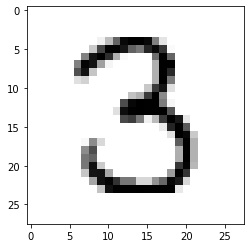

In [9]:
plt.imshow(np.reshape(X_train[0], (28, 28)), cmap=plt.cm.binary)

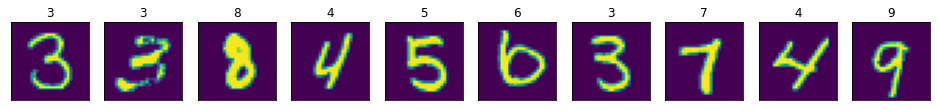

In [10]:
'''
Plotting 10 images from train set and their respective labels 
'''
fig=plt.figure(figsize=(50,20))
for i in range(10):
    image = X_train[i]
    image = image.reshape(28,28)
    ax=fig.add_subplot(2,30,i+1,xticks=[],yticks=[])
    plt.imshow(image)
    ax.set_title(y_train[i],color='black')

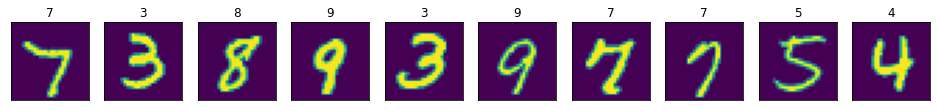

In [11]:
'''
Plotting 10 images from test set and their respective labels 
'''
fig=plt.figure(figsize=(50,30))
for i in range(10):
    image = X_test[i]
    image = image.reshape(28,28)
    ax=fig.add_subplot(5,30,i+1,xticks=[],yticks=[])
    plt.imshow(image)
    ax.set_title(y_test[i],color='black')

In [12]:
'''
Normalizing all feature vectors with l2 norm
'''
from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm = 'l2')
X_test = normalize(X_test,norm = 'l2')

In [13]:
np.sum(np.square(X_train[42]))

1.0000000000000009

In [14]:
'''
Distance function which returns matrix M, which contains euclidean distance between train set and test set 
(i, j)-th element of M represents the i-th data point in X_train and the j-th data point in X_test
Args:
X_1 -> train set
X_2 -> test set
'''
def dist(X_1,X_2):
  M = np.zeros((len(X_1),len(X_2)))
  for i in range(len(X_1)):
    for j in range(len(X_2)):
      # print(i)
      M[i][j] = np.linalg.norm(X_1[i] - X_2[j])

  return M

In [15]:
M = dist(X_train,X_test)

In [16]:
M.shape

(15000, 2500)

In [17]:
'''
retrieve function that returns nearest points in X_train for a point i in X_test
Args:
i - point in X_test
M - distance matrix
k - k nearest points in X_train, relative to i 
'''
def retrieve_k(i,M,k): 
  arr = np.argsort(M[:,i])[0:k]  
  return arr

In [18]:
'''
precision function for evaluation of search performance, returns a value between 0 and 1
Args:
y - label of query 
y_train - labels of y_train
Indices - index values from retrieve_k function 
'''
def precision_k(y,y_train,Indices):
  count = 0
  for i in Indices:
    if y_train[i] == y:
      count += 1
  return count/len(Indices)

In [19]:
idx = retrieve_k(42,M,10)

In [20]:
precision_k(y_test[42],y_train,idx)

1.0

In [21]:
'''
Calculates average precision for entire data set 
Args:
Xtrain - train set X_train
ytrain - label set y_train
Xtest - test set X_test
ytest - y_test
k - k nearest points
M - distance matrix
'''
def avg_precision_k(Xtrain, ytrain, Xtest, ytest, k, M):
  avg_prec = 0
  for i in range(len(Xtest)):
    idx1 = retrieve_k(i,M,k)
    prec = precision_k(ytest[i],ytrain,idx1)
    avg_prec += prec    
  return avg_prec / len(Xtest)

In [22]:
# average precision for 10 points 
avg_precision_k(X_train,y_train,X_test,y_test,10,M)

0.9308800000000023

## Plotting average precision for different number of nearest points


In [23]:
k = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
prec_list = []
for i in k:
  prec_list.append(avg_precision_k(X_train,y_train,X_test,y_test,i,M))

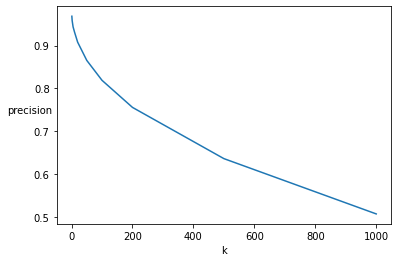

In [24]:
plt.xlabel("k")
plt.ylabel("precision",rotation=0)
plt.plot(k,prec_list)

### As expected, we see from the plot that by increasing the number of nearest points, the precision keeps getting inversely lower.